####                            
https://www.machinehack.com/course/financial-risk-prediction-weekend-hackathon-5/leaderboard

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import xgboost

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [5]:
#Read Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [6]:
train_df.shape

(543, 8)

In [7]:
print(train_df['IsUnderRisk'].value_counts(dropna = False))
y = train_df['IsUnderRisk']
y.shape

1    340
0    203
Name: IsUnderRisk, dtype: int64


(543,)

In [8]:
X = train_df.drop('IsUnderRisk', axis = 1)

In [9]:
for col in X.columns:
    print(col, X[col].unique(), X[col].nunique())

City [ 2 31 40 12  4  1  9 23 38  0 10  8 11 19  6 37  3  5 41 16 22 29 28 18
 35 13 32 14 30 43 39 21 24 25 17 33 15 27 20  7 42 44 26] 43
Location_Score [ 8.032 77.73  59.203 73.08  15.666  6.237 13.795 74.132 69.522  6.577
 75.514 34.522 34.374 22.872 16.313 16.396  9.537 16.433 41.253 22.067
  7.061 38.318 15.931  8.875 17.463  7.087 23.298 70.261 11.092 14.226
 21.448 73.111 73.793  9.606 12.058 17.908  7.11  73.507 68.547  5.518
 15.105 18.332 33.219 14.211 61.459 75.615 67.797 10.968  9.348 22.864
 73.972  9.138 16.482 17.024 64.502 16.893 63.372 12.337 61.625 62.94
 18.072 64.93  24.597 66.043 15.586  9.83  17.653  6.141 70.881 11.362
  7.031 11.446  8.165 22.682 68.387 18.916 21.057  9.183 69.686 17.085
 13.895 65.878 63.619 12.289 14.239 16.714 18.76  20.709 69.554 16.925
 19.273 32.018 12.78  13.312 13.948 20.751 11.506 68.709 16.466 73.469
 14.56  15.273 17.042 64.536  7.33   9.178 20.105 60.605 73.107 74.696
  6.99  10.026 11.969 13.858 62.755 16.789 11.703 58.664 71.89   

In [10]:
list(map(lambda col: (col,X[col].nunique()),X.columns))

[('City', 43),
 ('Location_Score', 540),
 ('Internal_Audit_Score', 13),
 ('External_Audit_Score', 13),
 ('Fin_Score', 13),
 ('Loss_score', 10),
 ('Past_Results', 7)]

### Analysing each column

#### 'External_Audit_Score'

Text(0, 0.5, 'IsUnderRisk')

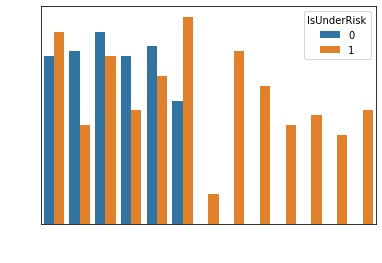

In [11]:
sns.countplot(x = 'External_Audit_Score', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'External_Audit_Score',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

###### If External_Audit_Score < 9, they have both categories. But if it is higher than 9, it is always 1

#### Internal_Audit_Score

Text(0, 0.5, 'IsUnderRisk')

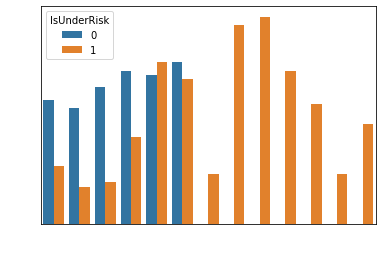

In [12]:
sns.countplot(x = 'Internal_Audit_Score', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'Internal_Audit_Score',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

###### If Internal_Audit_Score < 9, they have both categories. But if it is higher than 9, it is always 1

#### Fin_Score

Text(0, 0.5, 'IsUnderRisk')

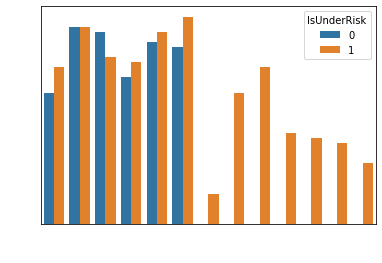

In [13]:
sns.countplot(x = 'Fin_Score', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'Fin_Score',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

###### If Fin_Score < 9, they have both categories. But if it is higher than 9, it is always 1

#### Loss_score

Text(0, 0.5, 'IsUnderRisk')

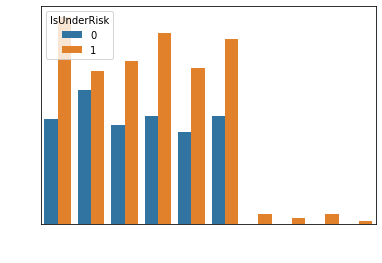

In [14]:
sns.countplot(x = 'Loss_score', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'Loss_score',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

###### If Loss_score < 9, they have both categories. But if it is higher than 9, it is always 1

#### Past_Results

Text(0, 0.5, 'IsUnderRisk')

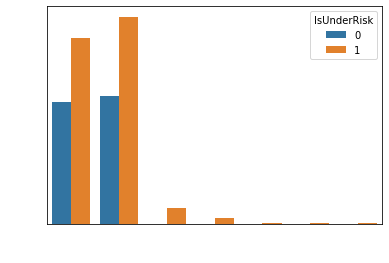

In [15]:
sns.countplot(x = 'Past_Results', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'Past_Results',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

###### If Past_Results < 2, they have both categories. But if it is higher than 2, it is always 1

#### City

Text(0, 0.5, 'IsUnderRisk')

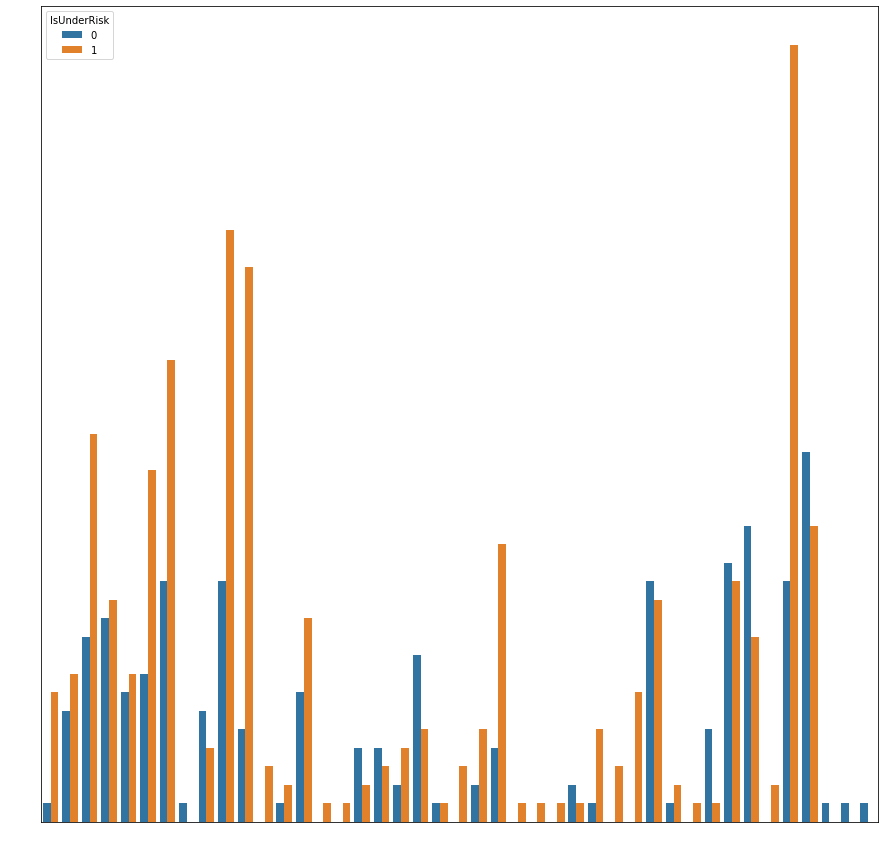

In [16]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'City', data=train_df, hue = 'IsUnderRisk')
plt.tick_params(colors='white', labelcolor = 'white')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3UAAANcCAYAAAD4rYbeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdf7TcdX3n8deVGwxKOMqPeICYAhVZg6mxCWj1bBBahQYLaPEIbY0UEHdXBLXEprqmGHfPac0q2tqjiytCjsqPQ41YjlK1gsjWlRKMJgiUFjUNpiAgGCsIhO/+MUMIeH/M/TEzec99PM6Zc2e+33s/8773ziT3eb7zY6hpmgAAAFDTM/o9AAAAAJMn6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGHD/R6gE/vuu29z0EEH9XsMAACAvli/fv29TdPsN9K+ElF30EEH5aabbur3GAAAAH0xNDT0o9H2efglAABAYaIOAACgMFEHAABQWInn1I3k0UcfzZYtW/Lwww/3e5S+mj17dubNm5dZs2b1exQAAKAPykbdli1bMmfOnBx00EEZGhrq9zh90TRN7rvvvmzZsiUHH3xwv8cBAAD6oOzDLx9++OHss88+MzbokmRoaCj77LPPjD9aCQAAM1nZqEsyo4PuCX4GAAAws5WOOgAAgJluoKJuzz33nND+iy++OGefffaEruO0007LlVdeOaGvOf/883PggQdm0aJFWbBgQS699NId+1atWpWvfe1r03p9AADAzFH2hVKqeOyxx5Ik73znO3PeeefljjvuyOLFi3PyySdn1qxZWb16dZ8nBAAAKhuoI3VP2Lp1a5YuXZpFixblxS9+cb75zW+O+zWnnXZazjnnnLziFa/IIYccsuPoWNM0Ofvss7NgwYIcf/zxueeee3Z8zfr163PUUUdl8eLFOfbYY7N169Ykyate9aq85z3vyVFHHZWPfvSjT7meQw89NM961rPy05/+dMf1PnFdK1euzIIFC/Ibv/EbOe+8835lxve973057bTT8vjjj0/uBwMAAAycgTxS97nPfS7HHnts3vve92b79u35xS9+0dHXbd26NTfccENuu+22nHDCCTn55JOzbt263H777dm4cWPuvvvuLFiwIKeffnoeffTRvP3tb89VV12V/fbbL5dffnne+9735qKLLkqSPPDAA/nGN76RpPXwyyfcfPPNOfTQQzN37tynXPf999+fdevW5bbbbsvQ0FAeeOCBp+x/97vfnQcffDCf/vSnvTgKAACww0BG3RFHHLEjvE466aQsWrRo1M/dOZBOOumkPOMZz8iCBQty9913J0muv/76nHrqqdltt91ywAEH5JhjjkmS3H777dm0aVNe/epXJ0m2b9+e/ffff8dab3zjG59yPRdccEE++clP5s4778w111zzK3PstddemT17ds4888wcf/zxee1rX7tj3wc+8IG87GUvy4UXXjiJnwYAADDIBvLhl0uXLs3111+fAw88MG9605uydu3aJMkee+yRRx55ZMfn3X///dl33313XH7mM5+543zTNDvOj3RkrGmaHH744dmwYUM2bNiQjRs35itf+cqO/c9+9rOf8vnvfOc7c/vtt+fyyy/P8uXLf+W95YaHh3PjjTfm93//9/OFL3whxx133I59RxxxRNavX5/7779/oj8KAABgwA1k1P3oRz/K3Llz85a3vCVnnHFGbr755iTJUUcdlc985jNJkoceeihXXHFFjj766DHXWrp0aS677LJs3749W7duzbXXXpskOeyww/KTn/wk3/rWt5Ikjz76aG655ZZxZ3v961+fJUuW5JJLLnnK9p///Od58MEHs2zZsnzkIx/Jhg0bduw77rjjsnLlyhx//PHZtm1b5z8IAABg4A3kwy+vu+66rFmzJrNmzcqee+6540jdRz/60bz1rW/NX/3VX6VpmixfvjxLly4dc63Xve51+frXv56FCxfmhS98YY466qgkye67754rr7wy55xzTh588ME89thjecc73pHDDz983PlWrVqVP/iDP8hb3vKWHdu2bduWE088MQ8//HCapskFF1zwlK95wxvekG3btuWEE07Il770peyxxx4T/bEAAAADaGjnhxnuqpYsWdLcdNNNT9l266235kUvelGfJtq1+FkAAMBgGxoaWt80zZKR9g3kwy8BAABmClEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFDeT71HVi8Yq107re+jXLO/q8a665Jueee262b9+eM888MytXrpzWOQAAgJnFkboe2r59e972trfly1/+cr7//e/n0ksvzfe///1+jwUAABQm6nroxhtvzAte8IIccsgh2X333XPKKafkqquu6vdYAABAYaKuh+666648//nP33F53rx5ueuuu/o4EQAAUJ2o66GmaX5l29DQUB8mAQAABoWo66F58+bl3/7t33Zc3rJlSw444IA+TgQAAFQn6nroiCOOyB133JEf/OAHeeSRR3LZZZflhBNO6PdYAABAYTP2LQ06fQuC6TQ8PJyPfexjOfbYY7N9+/acfvrpOfzww3s+BwAAMDhmbNT1y7Jly7Js2bJ+jwEAAAwID78EAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCvPolAAAwZZtXLxxz//xVG3s0ycwzY6NuvBvdRHV6Iz399NNz9dVXZ+7cudm0adO0zgAAAMw8Hn7ZY6eddlquueaafo8BAAAMCFHXY0uXLs3ee+/d7zEAAIABIeoAAAAKE3UAAACFiToAAIDCRB0AAEBhM/YtDfr1Phmnnnpqrrvuutx7772ZN29e3v/+9+eMM87oyywAAEB9Mzbq+uXSSy/t9wgAAMAA8fBLAACAwkQdAABAYaWjrmmafo/Qd34GAAAws5WNutmzZ+e+++6b0VHTNE3uu+++zJ49u9+jAAAAfVL2hVLmzZuXLVu25Cc/+Um/R+mr2bNnZ968ef0eAwAA6JOyUTdr1qwcfPDB/R4DAACgr8o+/BIAAABRBwAAUJqoAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFBYL6JutyTfSXJ1+/LBSb6d5I4klyfZvQczAAAADKReRN25SW7d6fJfJrkgyaFJfprkjB7MAAAAMJC6HXXzkhyf5P+0Lw8lOSbJle3LlyQ5qcszAAAADKxuR91Hkrw7yePty/skeSDJY+3LW5IcOMrXnpXkpvYJAACAEXQz6l6b5J4k63faNjTC5zWjfP2FSZa0TwAAAIxguItrvzLJCUmWJZmdZK+0jtw9p329j6X18Mwfd3EGAACAgdbNI3V/lla0HZTklCRfT/KHSa5NcnL7c96c5KouzgAAADDQ+vE+dX+a5F1J/iWt59h9qg8zAAAADIRuPvxyZ9e1T0lyZ5Ije3S9AAAAA60fR+oAAACYJqIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFBYN6NudpIbk3w3yS1J3t/efnGSHyTZ0D4t6uIMAAAAA224i2v/MskxSX6eZFaSG5J8ub1vRZIru3jdAAAAM0I3j9Q1aQVd0oq6We1tAAAATJNuP6dut7QeYnlPkq8m+XZ7+/9M8r0kFyR5ZpdnAAAAGFjdjrrtaT1nbl6SI5O8OMmfJflPSY5IsneSPx3la89KclP7BAAAwAh69eqXDyS5LslxSbam9TDMXyb5dFqxN5ILkyxpnwAAABhBN6NuvyTPaZ/fI8nvJLktyf7tbUNJTkqyqYszAAAADLRuvvrl/kkuSet5dc9IckWSq5N8Pa3gG0rr+Xb/pYszAAAADLRuRt33krx0hO3HdPE6AQAAZpRePacOAACALhB1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhQ33ewAg2bx64Zj756/a2KNJAACoxpE6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCuhl1s5PcmOS7SW5J8v729oOTfDvJHUkuT7J7F2cAAAAYaN2Mul8mOSbJS5IsSnJckpcn+cskFyQ5NMlPk5zRxRkAAAAGWjejrkny8/b5We1Tk1boXdnefkmSk7o4AwAAwEAb7vL6uyVZn+QFSf4myb8meSDJY+39W5IcOMrXntU+AROwefXCMffPX7WxR5MAANAL3X6hlO1pPfRyXpIjk7xohM9pRvnaC5MsaZ8AAAAYQa9e/fKBJNel9Zy65+TJI4Tzkvy4RzMAAAAMnG5G3X5pBVyS7JHkd5LcmuTaJCe3t785yVVdnAEAAGCgdfM5dfun9UIou6UVj1ckuTrJ95NcluR/JPlOkk91cQYAAICB1s2o+16Sl46w/c60nl8HAADAFPXqOXUAAAB0gagDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABTWzah7fpJrk9ya5JYk57a3n5/kriQb2qdlXZwBAABgoA13ce3HkvxJkpuTzEmyPslX2/suSPK/unjdAAAAM0I3o25r+5Qk29I6YndgF68PAABgxunVc+oOSvLSJN9uXz47yfeSXJTkuT2aAQAAYOB080jdE/ZM8rdJ3pHkZ0k+nuQDSZr2xw8lOX2ErzurfWKG2rx64Zj756/a2KNJAABg19XtI3Wz0gq6zyb5fHvb3Um2J3k8ySeTHDnK116YZEn7BAAAwAi6GXVDST6V1nPpPrzT9v13Ov+6JJu6OAMAAMBA6+bDL1+Z5E1JNqb11gVJ8p4kpyZZlNbDL3+Y5K1dnAEAAGCgdTPqbkjraN3TfamL1wkAADCj9OrVLwEAAOgCUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFTSXqnjltUwAAADApnUbdRU+7vGeSL03zLAAAAExQp1F3V5KPt88/N8lXknymKxMBAADQsU6j7n1JfpbkE2kF3YeSfLpbQwEAANCZ4XH2v36n8zemFXc3Jmna+z7fpbkAAADowHhR93tPu/ydJLPa25uIOgAAgL4aL+r+uCdTAAAAMCmdPqfug0n2Suso3T8kuTfJH3VrKAAAADrTadS9Jq0XSnltki1JXphkRbeGAgAAoDOdRt2s9sdlSS5Ncn93xgEAAGAixntO3RP+LsltSR5K8t+S7Jfk4W4NBQAAQGc6PVK3MslvJVmS5NEk/5HkxG4NBQAAQGfGO1J3TJKv56nvV7czb2kAAADQR+NF3VFpRd3T368u8T51AAAAfTde1P15+6P3qwMAANgFdfKcut2S7LvT5d2TnJXk1q5MBAAAQMfGi7pT0nr7gu8l+UaSo5PcmeR3k/xhd0cDAABgPOM9/PK/J1mc5F+S/GaSb6UVeuu6PBcAAAAdGO9I3SNpBV2S3JzkBxF0AAAAu4zxjtTNTfKunS7v+bTLH572iQAAAOjYeFH3ySRzxrgMAABAH40Xde9P69Uvz0lyQffHAQAAYCI6eUuD7UlO6PYgAAAATNx4R+qe8I9JPpbk8iT/sdP2m6d9IgAAADrWadS9ov1x9U7bmiTHTO84AAAATESnUXd0V6cAAABgUjp5Tl2SPC/Jp5J8uX15QZIzujIRAAAAHes06i5O8vdJDmhf/uck7+jGQAAAAHSu06jbN8kVSR5vX34srVfFBAAAoI86jbr/SLJPWi+OkiQvT/JgVyYCAACgY52+UMq7knwxya8n+b9J9ktycreGAgAAoDOdRt3NSY5KcliSoSS3J3m0W0MBAADQmfGi7vWjbH9h++Pnp3EWAAAAJmi8qPu99se5ab0B+dfbl49Ocl1EHQAAQF+NF3V/3P54dVrvTbe1fXn/JH/TraEAAADoTKevfnlQngy6JLk7Tz4EEwAAgD7p9IVSrkvrzccvTettDU5Jcm2XZgIAAKBDnUbd2Wm9aMp/bl++MMm6rkwEAABAxzqNuqT1oiheGAUAAGAX0ulz6l6f5I4kDyb5WZJt7Y8AAAD0UadH6j6Y1tsb3NrFWQAAAJigTo/U3R1BBwAAsMvp9EjdTUkuT/KFJL/cabvn2AEAAPRRp1G3V5JfJHnNTtuaiDoAAIC+6jTq/rirUwAAADAp40XdX6d1RO4JTZJ703rj8Ru6NRQAAACdGS/qbhph295J1qT1HLuPTPtEAAAAdGy8qLtklO2fSPKPEXUd27x64aj75q/a2MNJAACAQdLpWxo83UPTOgUAAACT0ukLpTz9a96UZMs0zwIAAMAEjRd12/LUF0pJWkfpvpHkrV2ZCAAAgI6NF3VzejIFAAAAk9Lpc+pemeTZ7fN/lOTDSX6tKxMBAADQsU6j7uNJfpHkJUneneRHSdZ2aygAAAA602nUPZbWc+tOTPLR9slDMwEAAPqs01e/3Jbkz9J66OXSJLslmdWtoQAAAOhMp0fq3pjkl0nOSPLvSQ5MsqZbQwEAANCZTo/U/XtaL47yhM3xnDoAAIC+m8z71CXJUHv7XtM+EQAAAB3zPnUAAACFdfqcOgAAAHZBog4AAKCwbkbd85Ncm+TWJLckObe9fe8kX01yR/vjc7s4AwAAwEDrZtQ9luRPkrwoycuTvC3JgiQrk/xDkkPbH1d2cQYAAICB1s2o25rk5vb5bWkdsTswyYlJLmlvvyTJSV2cAQAAYKB1+j51U3VQkpcm+XaS56UVfGl/nDvK15zVPgEAAANm8Yqx3/Z6/ZrlPZqkvl5E3Z5J/jbJO5L8bAJfd2H7lIz8XnkAAAAzXrdf/XJWWkH32SSfb2+7O8n+7fP7J7mnyzMAAAAMrG5G3VCST6X1XLoP77T9i0ne3D7/5iRXdXEGAACAgdbNh1++MsmbkmxMsqG97T1J/iLJFUnOSLI5yRu6OAMAAMBA62bU3ZDW0bqR/HYXrxcAAGDG6PZz6gAAAOgiUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFDbc7wEYLJtXLxxz//xVG3s0CQAAzAyO1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUNhwvwcAAACetHjF2lH3rV+zvIeT9Nfm1QvH3D9/1cYeTbLrc6QOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIV1M+ouSnJPkk07bTs/yV1JNrRPy7p4/QAAAAOvm1F3cZLjRth+QZJF7dOXunj9AAAAA6+bUXd9kvu7uD4AAMCMN9yH6zw7yfIkNyX5kyQ/HeXzzmqfAIBRbF69cMz981dt7NEkAPRLr18o5eNJfj2th15uTfKhMT73wiRL2icAAABG0OuouzvJ9iSPJ/lkkiN7fP0AAAADpddRt/9O51+Xp74yJgAAABPUzefUXZrkVUn2TbIlyZ+3Ly9K0iT5YZK3dvH6AQAABl43o+7UEbZ9qovXBwAAMOP0+uGXAAAATCNRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKG+73AAAAUNniFWvH3L9+zfIeTcJM5UgdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGHD/R6AmW3xirWj7ls3p4eDdNlY32cyWN8rAHWN9//V+jXLezTJYNm8euGY++ev2tijSaZupvztVo0jdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDChvs9ABO3efXCMffPX7WxR5MAADOJv0Fg1+RIHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhw/0egF+1eMXaMfevm9OjQWAXt3n1wjH3z1+1sUeTAAD0jyN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABTWzai7KMk9STbttG3vJF9Nckf743O7eP0AAAADr5tRd3GS4562bWWSf0hyaPvjyi5ePwAAwMDrZtRdn+T+p207Mckl7fOXJDmpi9cPAAAw8IZ7fH3PS7K1fX5rkrljfO5Z7VMJi1esHXP/ujk9GgQAgIG1efXCMffPX7WxR5OwK+l11E3Ehe1TkjT9HAQAAGBX1etXv7w7yf7t8/un9UIqAAAATFKvo+6LSd7cPv/mJFf1+PoBAAAGSjej7tIk30pyWJItSc5I8hdJXp3WWxq8un0ZAACASermc+pOHWX7b3fxOgEAAGaUXj/8EgAAgGkk6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwob7PQAAM8fiFWvH3L9+zfIeTQIAg8OROgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioA2RQPQMAABUBSURBVAAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhw/0eYFe1efXCMffPX7WxR5N031jf69O/z8Ur1o651ro50zISAADQIUfqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAob7vcA02nz6oWj7pu/amMPJ9m1LF6xdsz96+b0aBCYILddgKnz9xEMPkfqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIUN93uAflm8Yu2Y+9fN6dEg7LLGuo2sX7O8h5MAAMDoHKkDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGHDfbreHybZlmR7kseSLOnTHAAAAKX1K+qS5Ogk9/bx+gEAAMrz8EsAAIDC+nWkrknylfbH/53kwhE+56z2CXiaxSvWjrpv3ZweDgLTbPPqhaPum79qYw8n6a6xvs9ksL7XmWKm3HYHyVj/l65fs7yHk8DU9SvqXpnkx0nmJvlqktuSXP+0z7kwT8Ze07vRAAAA6ujXwy9/3P54T5J1SY7s0xwAAACl9SPqnp1kzk7nX5NkUx/mAAAAKK8fD798XlpH5564/s8luaYPcwAAAJTXj6i7M8lL+nC9AAAAA8dbGgAAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYcP9HgAq2rx64Zj756/a2KNJGASLV6wdc//6Ncv7ut5Y3Bd6Y6zf6bo5PRwEgF2SI3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhQ33ewBg17Z59cIx989ftbFHkzBdxvqd+n2OzP2AXnJ7AybKkToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChM1AEAABQm6gAAAAoTdQAAAIWJOgAAgMJEHQAAQGGiDgAAoDBRBwAAUJioAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYcP9HgCYOTavXjjm/vmrNvZoklr6+XNbvGLtmPvXzenaVZfm59Z/4/0O1q9Z3qNJGMtY/775P6E3/N88GBypAwAAKEzUAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFCYqAMAAChsuN8DTMTiFWvH3L9uTo8GYZc03u1j/ZrlPZpk5qp8H928euGY++ev2jht6010LUY2/u1tzZj7/R5GNp33hV7erya63kTXqvzvWz/18ue2K9926Y2xbm8T/TtwOv+u7MXfqI7UAQAAFCbqAAAAChN1AAAAhYk6AACAwkQdAABAYaIOAACgMFEHAABQmKgDAAAoTNQBAAAUJuoAAAAKE3UAAACFiToAAIDCRB0AAEBhog4AAKAwUQcAAFBYv6LuuCS3J/mXJCv7NAMAAEB5/Yi63ZL8TZLfTbIgyantjwAAAExQP6LuyLSO0N2Z5JEklyU5sQ9zAAAAlDfUNE2vr/PktB5+eWb78puSvCzJ2U/7vLPap+yxxx6HPfzww7ePt/Dznve8fe++++57p2PI6VxrutebKbPNlO9zutczW//Xmu71zDZYa033embr/1rTvZ7ZBmut6V7PbP1fa7rXm8Bav9Y0zX4j7RiejkEmaGiEbSOV5YXtUx566KFO174pyZLJjdXVtaZ7vZky20z5Pqd7PbP1f63pXs9sg7XWdK9ntv6vNd3rmW2w1pru9czW/7Wme70pr9WPh19uSfL8nS7PS/LjPswBAABQXj+i7p+SHJrk4CS7JzklyRf7MAcAAEB5u51//vm9vs7Hk9yR5LNJ3p7kM0n+dhrXX7+LrjXd682U2WbK9znd65mt/2tN93pmG6y1pns9s/V/relez2yDtdZ0r2e2/q813etNaa1+vFAKAAAA06Rfbz4OAADANBB1AAAAhQ1K1B2X5Pa03tR85RTXuijJPUk2TXWotF7l89oktya5Jcm5U1xvdpIbk3y3vd77p7hekuyW5DtJrp6GtX6YZGOSDWm9NOtUPCfJlUluS+vn91tTWOuw9kxPnH6W5B1TWO+daf38NyW5NK3fy2Sd217nlknONNLtde8kX03ruatfTfLcKa73hvZ8j2diL7c70lpr0vqdfi/JurR+z1NZ7wPttTYk+UqSA6aw1hPOS+ttVvadwlrnJ7krT97mlnW41lizvT2tf+duSfLBKax1+U5z/bD9cSqzLUry//Lk/f7IKaz1kiTfSuvfkb9LsleHa432b+1k7wujrTeZ+8Joa032vjDaepO5L4z3f9RE7wujrXd+Jn5/GGu2ydwXRltvMveH0daa7H1htPUmc38Y7e+Eg5N8O637wuVpvVBdJ0Zb7+y0/uaayO1jtLU+m9bvc1Na/y7MmuJ6n2pv+15af0fsOYW1Lk7ygzx5G1k0hbW+udM6P07yhQ7WGmu9305yc3u9G5K8YAprHdNea1OSSzLxtzx7+t+Sk729jbTWZG5ro6012dvaaOtN5rY22lpP+OskP5/gXC1N01Q/7dY0zb82TXNI0zS7N03z3aZpFkxhvaVN0/xm0zSbpmG2/dtrpWmaOU3T/PMUZxtqmmbP9vlZTdN8u2mal09xxnc1TfO5pmmunobv94dN0+w7Tb/XS5qmObN9fvemaZ4zTevu1jTNvzdN82uT/PoDm6b5QdM0e7QvX9E0zWmTXOvFTet29qymaYabpvla0zSHTnCNkW6vH2yaZmX7/Mqmaf5yiuu9qGmaw5qmua5pmiVTXOs17e817bmmOtteO50/p2maT0xhrTRN8/ymaf6+aZofNZ3flkda6/ymac6b4O9yrPWOblq3j2e2L8+d4vf5xOlDTdOsmuJsX2ma5nfb55c1rdvJZNf6p6ZpjmqfP71pmg90uNZo/9ZO9r4w2nqTuS+MttZk7wujrTeZ+8JY/0dN5r4w2nqTuT+MttZk7wud/H/c6f1htLUme18Ybb3J3B9G+zvhiqZpTmlv/0TTNP+1w9lGW++lTdMc1Ezs//3R1lrW3jfU/P/2zj/GjqqK458t/REKldRatbJobUMBJQYtRcKPii0grVqsVqupQKxorDZaTUQrBpWEpEal/QtILJakrfwoKNYIxIQKEmNEK2xpu6W0BulKf4AGrRL78/jHmZc3+5z7dubeWba7+/0kk/d29r1vzrw558459965Y3Z3DbblY+FWa7YBMVp3mdmCkvb0pZX/zANmdm2i3k7zNgkz+2Jma4zWRWa2x8ymZftvNrPPVjzm1lwy1t+KtGJ8LaQV62shvRhfC2lhfl1Za2b/rmgXZjYkRuouwCv4vwCHgXuAqxP0fgv8owa7APbiPR8AB/FeuNMT9Ixm9T4q21JWuukEPgisTtDoD14HzMR7QMDP6ys1ac8GdgN/TdAYCZycvY4l/jmL5+C9uq8CR4HHgfkVNYr89Wq8p43s9SOJet14z1ZVirR+jR8r+LF3Jur9K/f+FMrHQyjOVwI3VNBppxVLkd4SYAVwKPv7QIJWgw7gE/hoc4ptRnME4TTKx0OR1lnZfvCRtY+V1Aq1tbGxENKLiYWQVmwshPRiYqHdNSomFuq85oW0YmOhL9uqxENIKzYWQnox8RDKE2bhIwlQLRZCek/hI5tVCGk9lL0aPopUNhZCeo1Y6MCv1WV8uM78qi+tcfj5KDtSF9KL8bcirWN4PO3M9ldpe+H/c8kO4v2tKC+N8bWQVqyvhfRifC2kdRI+g+OGCjb1YigUdacDe3J/95BWOPUXk4F348PRKZyED7UfwAMvRW8V7jzHE21qYHiishn4fILOFOAlYA0ezKvxJKUOPkm1JLaVvwE/BF7AL8T/xI85hq148ToBLw7n4tNwUnlTZhvZ6xtr0OwPFgMP16BzC94GLAJuStCZh5/frhpsAp8ysgWf4lFlCmwR04BL8Xh/HJiRqEemtx+fHpPCMvxCtAePjeUJWlvx8wA+1TEmHibTbGvriIW8XiohrdhYaNVLiYW8Vh2x0GpbSjzkteqIhVbbID4e8lp1xEJeLzYeWvOE3XjHaKMToWqeVGfe0U5rFHAN8EgNemuAfcDZ+HS2FK1bcN9dCYxJ1ALvvH2U3h0xMXrX40VKD/67rYjUehL/7RtTyhdQre1tzSUnEO9vdeal7bRifC2kF+NrRVpL8ed27y38RgmGQlHXUbDvRHtOw6n4s/iWUS2IiziGz+nuxEcpz43U+RAe0HU+X+Ni4D3AHOBLeMESw8hM53b84vYf0u+VBJ/TPQ/YkKAxHu/9fzt+z8opwKcjtbqB7+ON6iN4AnW07TeGDjfix7q+Jq0zMq2lkRpjM52UojDP7cBUPFb3Aj9K1BuJ+96FwNeB+yhu+6rwKdI6OBoswe8zPSN7vbP9x9uyGG87NuO92Ycrfr/OtrZuvZBWbCwU6cXGQl7rKOmx0GpbSjy0aqXGQug8xMRDq1ZqLLTqxcZDa55wTsFnquRJdeUdfWndho9MPlGD3mfwa3Q3sDBBazmerM/A79H9RqJdEOdrRXpfxTuDO/HC4tZIrXfiHd4r8QLvIOVzkaJcMjYvrzMv7Uurqq+106vqa0Vab8E7bsoWhYUMhaKuh949Cp3ET4frD0bhjfR64Gc16r4CPIYvEhPDxXiB8zw+ZXUW/iD4FBq/+wH8xv+yN4m30pNtjZ6t+/EiL5U5+BSX/Qkal+M3Tb8EHMHP6UUJenfixzYTn4qWOmoCfnyTsveTKD896bXiOrxRW0S9HTA/pdqUkTxT8UK9C4+JTtxX3hyptx+/cB4Hfkx8LDTowX2tMWXkONVvGM8zEvgofgN7KtfRbNs2kHasO4Argel40rO7wneL2tqUWKiz7Q5pxcZCX7ZViYVWrdRYCJ2HmHgo0kqJhdDvFhMPRVopsVCklxIP0MwTLsQX4mksfhGbJ6XmHe20vgNMBL5Wkx64z91L9etCXmsv7muH8MKpavvWateETONXFXVa9ebgC+k08qR7qZ6L5G37PT5afQFe7JTNRYpyyVXE+VudeWk7rRhf68u2Kr5WpLUNX+hmV7Z/bPa+EkOhqPsjcCZ+ERqN9zZsHFCLmnTgSXs35XtQ2jGR5gppJ+MFxo5IreV4oE3Gf7NNxI84gY9Yjcu9v5L4FUT34dNXzsr+ng1sT7CtQR0jEy/gF8ix+PmdjZ/fWBrTwd6KJxV1jJxsxJMLstdf1KBZF1fhPZ3z8HsJUzkz934e8fHwDH4uJmdbD15s74vUm5R7P5/01XQfxBt+8Olno4GXE/QabUdPol3gF+v3Ze9nkdYx0YiHEcC3gTtKfi/U1sbGQp1td0grNhZCejGxUKSVEgsh22LiIaQVGwvtzmnVeAhpxcZCSC8mHoryhG58dc0F2f4qsVBn3hHSuh74AH6NrjLtrkjvWZqrQHYAHy5pb8i2hu924PeFlfHddr/Zx/HVDv9bQqedXjd+H920bP8VlMtFQrY1fG0M3i6VbXuLcslFxPlbnXlpSCvW14r0riHO14q0xuMdZ5Oz7VXKrWbam5jVVU7Aba75KkC7zezGRK27zWyvmR0xsx6rvgJQfrvEnC1m9nS2zU3Qe5eZPZXpbbVqq9a12y6z9NUvp5ivPNplZttqOA/nmdmfsmN90MzGJ+qNNbO/m9lpNfxe3zOzHdk5WGvNVdhitifMbHv2u82O+H6Rv04ws0fN7Lns9fWJevOz94fMbL/5inixWrvMV9lqxEPZ1SpDeg9k52GLmf3SfHXSWK38/5+38qtsFWmtNbNnMrs2mq9ul3Kco81sXXasfzazWYnHeZeZfaGCTe30LjGzzeY+/Aczm56g9RXztnynma0wX6GsjFaorY2NhZBeTCyEtGJjIaQXEwtlrlFVYiGkFxMPIa3YWGh3rFXjIaQVGwshvZh4COUJU8zsSXO/22Dlr1shvS+bx8JRM3vRzFYnaB01z98ax142tynSG2FmvzP3t61mtt56r1BY1bZNOa111lw5MkYL8xVRryp5fH3pzc9s68p0pyRo/cDMus3sWTNbVtG+xnaZNXPJWH8r0orxtZBWrK8V6cX6Wsi2/Ba1+mWH2Yl2+5kQQgghhBBCiLIMhemXQgghhBBCCDFsUVEnhBBCCCGEEIMYFXVCCCGEEEIIMYhRUSeEEEIIIYQQgxgVdUIIIYQQQggxiFFRJ4QQQvgzgu7BH/C8HXgImAncn/3/PGDuwJgmhBBCtEdFnRBCiOFOB/Bz4DFgKvAO4FuA0XyAroo6IYQQJywq6oQQQgx33g8cAe7I7Xsa2ANsBUYDNwMLs/0LgeeAidlnRwC7gDe8RvYKIYQQvRg50AYIIYQQA8y5wOY2/z8M3AScDyzN9p0NLAJWAZcDXcDL/WijEEIIEUQjdUIIIUR1fgJcm71fDKwZQFuEEEIMc1TUCSGEGO5sA6ZX/M4eYD8wC3gv8HDdRgkhhBBlUVEnhBBiuLMJGAN8LrdvBvC23N8HgXEt31sNrAPuA471p4FCCCFEO1TUCSGEGO4YMB+4An+kwTbgu8CLuc/8Bl8Vs7FQCsBG4FQ09VIIIcQA02FmA22DEEIIMRg5H1gJXDrQhgghhBjeaPVLIYQQojrfBJbgK2AKIYQQA4pG6oQQQgghhBBiEKN76oQQQgghhBBiEKOiTgghhBBCCCEGMSrqhBBCCCGEEGIQo6JOCCGEEEIIIQYxKuqEEEIIIYQQYhDzP1t4G5VbC3l5AAAAAElFTkSuQmCC
plt.xlabel(xlabel = 'City',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

In [23]:
pd.set_option('display.max_rows', 999)
train_df.groupby(['City', 'IsUnderRisk']).count()['Location_Score']

City  IsUnderRisk
0     0               1
      1               7
1     0               6
      1               8
2     0              10
      1              21
3     0              11
      1              12
4     0               7
      1               8
5     0               8
      1              19
6     0              13
      1              25
7     0               1
8     0               6
      1               4
9     0              13
      1              32
10    0               5
      1              30
11    1               3
12    0               1
      1               2
13    0               7
      1              11
14    1               1
15    1               1
16    0               4
      1               2
17    0               4
      1               3
18    0               2
      1               4
19    0               9
      1               5
20    0               1
      1               1
21    1               3
22    0               2
      1               

In [67]:
train_df.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [71]:
list(train_df.columns)

['City',
 'Location_Score',
 'Internal_Audit_Score',
 'External_Audit_Score',
 'Fin_Score',
 'Loss_score',
 'Past_Results',
 'IsUnderRisk']

In [24]:
filtered_with_1 = train_df[(train_df['External_Audit_Score'] > 9) | (train_df['Internal_Audit_Score'] > 9) | (train_df['Fin_Score']>9) | (train_df['Loss_score'] >9) | (train_df['Past_Results']>2)]

In [25]:
print(filtered_with_1['IsUnderRisk'].unique())
filtered_with_1.shape

[1]


(252, 8)

In [26]:
filtered_with_1.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
2,40,59.203,3,12,11,3,0,1
4,4,15.666,13,15,6,7,2,1
5,1,6.237,10,10,12,3,1,1
7,23,74.132,11,15,5,8,0,1


In [28]:
filtered_X = train_df.drop(filtered_with_1.index).drop('IsUnderRisk', axis = 1)
filtered_y = train_df.drop(filtered_with_1.index)['IsUnderRisk']
print(filtered_X.shape, filtered_y.shape)

(291, 7) (291,)


Text(0, 0.5, 'IsUnderRisk')

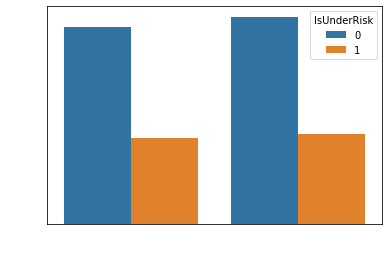

In [66]:

sns.countplot(x = filtered_X['Past_Results'], hue = filtered_y)
plt.tick_params(colors='white', labelcolor = 'white')
plt.xlabel(xlabel = 'Past_Results',color = "white")
plt.ylabel(ylabel = 'IsUnderRisk',color = "white")

In [29]:
X_train, X_val, y_train, y_val =  train_test_split(filtered_X, filtered_y, test_size = 0.05, random_state = 0)

In [30]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(276, 7) (15, 7) (276,) (15,)


In [31]:
classifier_1 = LogisticRegression()
classifier_1.fit(X_train, y_train)
y_val_pred = classifier_1.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

[[6 4]
 [5 0]]
0.4


In [33]:
y_val_pred_prob = classifier_1.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1]) 

0.7893136402387165

In [34]:
print(y_val_pred_prob)
y_val.values

[[0.7563308  0.2436692 ]
 [0.32752474 0.67247526]
 [0.53180802 0.46819198]
 [0.77999652 0.22000348]
 [0.83849095 0.16150905]
 [0.64930961 0.35069039]
 [0.56096435 0.43903565]
 [0.60401899 0.39598101]
 [0.50364156 0.49635844]
 [0.48602455 0.51397545]
 [0.41703342 0.58296658]
 [0.34835869 0.65164131]
 [0.85396794 0.14603206]
 [0.77297383 0.22702617]
 [0.59475102 0.40524898]]


array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
sorted(filtered_X['City'].unique())
#It seems regardless of the city, the scores are based on other scores. Because the cities that 
#contain only one category should be present atleast once in this filtered data but it is not
#This shows that all those data are already captured by scores filter itself.

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 27,
 28,
 31,
 32,
 35,
 37,
 38,
 40,
 41,
 42,
 43,
 44]

In [100]:
filtered_y.value_counts()

0    203
1     88
Name: IsUnderRisk, dtype: int64

In [118]:
filtered_with_1_test = test_df[(test_df['External_Audit_Score'] > 9) | (test_df['Internal_Audit_Score'] > 9) | (test_df['Fin_Score']>9) | (test_df['Loss_score'] >9) | (test_df['Past_Results']>2)]      

In [106]:
submission_df = pd.read_excel('Sample_Submission.xlsx')
submission_df.head()

,0,1
0,0.005016,0.994984
1,0.612204,0.387796
2,0.844945,0.155055
3,0.004671,0.995329
4,0.175931,0.824069


In [112]:
submission_df = submission_df.replace(submission_df, 0)

In [113]:
submission_df.head()

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [119]:
filtered_with_1_test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
3,3,16.492,15,10,7,4,1
8,29,6.163,7,14,3,4,0
9,5,62.562,10,14,5,3,0


In [123]:
submission_df.loc[filtered_with_1_test.index, 1] = 1
submission_df.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [124]:
#full fit
classifier_1.fit(filtered_X, filtered_y)
y_test_proba = classifier_1.predict_proba(test_df.drop(filtered_with_1_test.index))

In [127]:
set(test_df.index) - set(filtered_with_1_test.index)

{2,
 4,
 5,
 6,
 7,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 20,
 21,
 23,
 24,
 26,
 29,
 30,
 34,
 35,
 37,
 38,
 39,
 41,
 42,
 43,
 45,
 46,
 52,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 74,
 76,
 78,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 93,
 96,
 97,
 98,
 100,
 101,
 104,
 106,
 108,
 110,
 111,
 113,
 114,
 120,
 122,
 123,
 124,
 126,
 130,
 131,
 132,
 133,
 136,
 137,
 138,
 139,
 141,
 144,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 161,
 162,
 163,
 165,
 166,
 169,
 173,
 174,
 176,
 183,
 184,
 185,
 189,
 190,
 191,
 196,
 199,
 201,
 205,
 206,
 208,
 210,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 226,
 228,
 229,
 230,
 232}

In [128]:
predicted_df = pd.DataFrame(y_test_proba,columns = [0,1], index = list(set(test_df.index) - set(filtered_with_1_test.index)))

In [129]:
predicted_df.head()

,0,1
2,0.946374,0.053626
4,0.609942,0.390058
5,0.815680,0.184320
6,0.676823,0.323177
7,0.857157,0.142843


In [137]:
submission_df[submission_df.loc[:,1] == 1].index

Int64Index([  0,   1,   3,   8,   9,  10,  14,  19,  22,  25,
            ...
            207, 209, 211, 213, 215, 221, 224, 225, 227, 231],
           dtype='int64', length=106)

In [144]:
submission_df_1 = pd.concat([submission_df[submission_df.loc[:,1] == 1],predicted_df])

In [147]:
submission_df_1.sort_index(inplace=True)

In [148]:
submission_df_1.head()

,0,1
0,0.000000,1.000000
1,0.000000,1.000000
2,0.946374,0.053626
3,0.000000,1.000000
4,0.609942,0.390058


In [150]:
submission_df_1.to_excel('Submission_1.xlsx', index = False)

In [162]:
#Without filtering
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.1, random_state = 0)

In [163]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
classifier_2= LogisticRegression()
classifier_2.fit(X_train, y_train)
y_val_pred = classifier_1.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

(488, 7) (55, 7) (488,) (55,)
[[16  4]
 [ 6 29]]
0.8181818181818182


In [164]:
y_val_pred_prob = classifier_2.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1]) 

0.35578488948059644

In [165]:
#full fit
classifier_2.fit(X, y)
y_test_proba = classifier_1.predict_proba(test_df)
y_test_proba.shape

(233, 2)

In [166]:
submission_df_2 = pd.DataFrame(y_test_proba, columns = [0,1])
submission_df_2.head()

,0,1
0,0.002631,0.997369
1,0.444797,0.555203
2,0.961710,0.038290
3,0.002037,0.997963
4,0.484890,0.515110


In [167]:
submission_df_2.to_excel('Submission_2.xlsx', index = False)

In [168]:
pd.read_excel('Submission_2.xlsx')

,0,1
0,0.002631,0.997369
1,0.444797,0.555203
2,0.961710,0.038290
3,0.002037,0.997963
4,0.484890,0.515110
...,...,...
228,0.839715,0.160285
229,0.134328,0.865672
230,0.404221,0.595779
231,0.000974,0.999026


#### Remove City and try

In [39]:
X_train, X_val, y_train, y_val =  train_test_split(filtered_X.drop('City',axis = 1), filtered_y, test_size = 0.05, random_state = 0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(276, 6) (15, 6) (276,) (15,)


In [42]:
y_train.value_counts()

0    193
1     83
Name: IsUnderRisk, dtype: int64

In [41]:
classifier_3 = LogisticRegression()
classifier_3.fit(X_train, y_train)
y_val_pred = classifier_3.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

y_val_pred_prob = classifier_3.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1]) 


[[7 3]
 [5 0]]
0.4666666666666667


0.7812579835762434

#### The loss is reduced when City is removed.

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
classifier_4 = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier_4.fit(X_train, y_train)
y_val_pred = classifier_4.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(f1_score(y_val, y_val_pred))

y_val_pred_prob = classifier_4.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1]) 


[[7 3]
 [3 2]]
0.4000000000000001


3.0036624178380555

In [51]:
classifier_4.classes_

array([0, 1], dtype=int64)

In [64]:
#Without filter
X_train, X_val, y_train, y_val =  train_test_split(X.drop('City', axis = 1), y, test_size = 0.1, random_state = 0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
classifier_4 = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier_4.fit(X_train, y_train)
y_val_pred = classifier_4.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(f1_score(y_val, y_val_pred))

y_val_pred_prob = classifier_4.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1])  
#0.4615320601716421 - without city #0.5057576082310664 - with city 
#0.4535153530883228 100 estimators

(488, 6) (55, 6) (488,) (55,)
[[16  4]
 [ 7 28]]
0.8358208955223881


0.42030989986084033

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
classifier_5 = DecisionTreeClassifier(random_state = 0)
classifier_5.fit(X_train, y_train)
y_val_pred = classifier_5.predict(X_val)

print(confusion_matrix(y_val, y_val_pred))
print(f1_score(y_val, y_val_pred))

y_val_pred_prob = classifier_5.predict_proba(X_val)
log_loss(y_val.values,y_val_pred_prob[:,1]) 


[[7 3]
 [2 3]]
0.5454545454545454


11.513085384456266

In [58]:
y_val.values,y_val_pred_prob[:,1]

(array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.]))

In [71]:
type(y_val_pred)

numpy.ndarray

### Using filter but training with full data

In [69]:
filtered_with_1

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
2,40,59.203,3,12,11,3,0,1
4,4,15.666,13,15,6,7,2,1
5,1,6.237,10,10,12,3,1,1
7,23,74.132,11,15,5,8,0,1
10,4,75.514,8,12,4,4,0,1
11,0,34.522,11,10,14,3,1,1
14,9,16.313,14,10,3,4,1,1
15,11,16.396,13,15,8,6,0,1
17,9,16.433,12,11,15,3,1,1


In [70]:
def mask(df):
    return (df['External_Audit_Score'] > 9) | (df['Internal_Audit_Score'] > 9) | (df['Fin_Score']>9) | (df['Loss_score'] >9) | (df['Past_Results']>2)

In [101]:
X_train, X_val, y_train, y_val =  train_test_split(X.drop('City',axis = 1), y, test_size = 0.1, random_state = 0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(488, 6) (55, 6) (488,) (55,)


In [102]:
classifier_6 = LogisticRegression()
classifier_6.fit(X_train, y_train)
y_val_pred = classifier_6.predict(X_val)
mk_1 = mask(X_val)
y_val_pred[mk_1] = 1

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

y_val_pred_prob = classifier_6.predict_proba(X_val)

print(log_loss(y_val.values,y_val_pred_prob[:,1]) )

y_val_pred_prob[mk_1] = (0,1)

log_loss(y_val.values,y_val_pred_prob[:,1]) 

[[15  5]
 [ 6 29]]
0.8
0.3636320417195454


0.3421819387732619

#### Using filter but training with full data but including city

In [105]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(488, 7) (55, 7) (488,) (55,)


In [106]:
classifier_7 = LogisticRegression()
classifier_7.fit(X_train, y_train)
y_val_pred = classifier_7.predict(X_val)
mk_1 = mask(X_val)
y_val_pred[mk_1] = 1

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

y_val_pred_prob = classifier_7.predict_proba(X_val)

print(log_loss(y_val.values,y_val_pred_prob[:,1]) )

y_val_pred_prob[mk_1] = (0,1)

log_loss(y_val.values,y_val_pred_prob[:,1]) 

[[16  4]
 [ 6 29]]
0.8181818181818182
0.35578488948059644


0.336530420179718

In [107]:
classifier_7.coef_

array([[-0.0096088 , -0.02574489,  0.49056678,  0.30372335,  0.19957193,
         0.11291203,  0.16645528]])

In [108]:
X_train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results'],
      dtype='object')

#### Using Feature Scaling

In [122]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
train_index = X_train.index
train_col = X_train.columns
val_index=  X_val.index

(488, 7) (55, 7) (488,) (55,)


In [123]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)
X_train_sc = pd.DataFrame(X_train_sc, columns = train_col, index = train_index)
X_val_sc = pd.DataFrame(X_val_sc, columns = train_col, index = val_index)

In [124]:
X_train_sc.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
233,-0.119421,-0.841768,-1.239347,-1.259529,1.881221,1.342193,-0.791066
78,-1.211270,1.523746,-0.942147,-0.680762,-1.281148,-0.273737,-0.791066
483,0.767707,1.627036,-0.644948,0.187387,0.300036,-0.812380,-0.791066
282,0.699466,-0.835151,1.732650,-1.259529,0.300036,0.803550,-0.791066
46,0.221782,1.447529,-1.536547,-0.970145,0.300036,-1.351023,-0.791066


In [126]:
classifier_8 = LogisticRegression()
classifier_8.fit(X_train_sc, y_train)
y_val_pred = classifier_8.predict(X_val_sc)
mk_1 = mask(X_val)
y_val_pred[mk_1] = 1

print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))

y_val_pred_prob = classifier_8.predict_proba(X_val_sc)

print(log_loss(y_val.values,y_val_pred_prob[:,1]) )

y_val_pred_prob[mk_1] = (0,1)

log_loss(y_val.values,y_val_pred_prob[:,1]) 

[[16  4]
 [ 6 29]]
0.8181818181818182
0.35726932781190684


0.3362088673774375

In [127]:
np.cov(train_df['City'], train_df['IsUnderRisk'])

array([[216.75752448,  -0.62358905],
       [ -0.62358905,   0.23451781]])

In [128]:
from scipy.stats import spearmanr
spearmanr(train_df['City'], train_df['IsUnderRisk'])

SpearmanrResult(correlation=-0.07167134310612426, pvalue=0.09523459043911237)